In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from flep_analysis_tools import *

In [2]:
flep_df = pd.read_csv("../../data/flep/EPFL_menus.csv", on_bad_lines="skip", encoding_errors="ignore")
print(flep_df.info());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5091 non-null   object 
 1   restaurant  5093 non-null   object 
 2   date        5093 non-null   object 
 3   STUDENT     5093 non-null   float64
 4   DOCTORANT   5093 non-null   float64
 5   CAMPUS      5093 non-null   float64
 6   VISITOR     5093 non-null   float64
dtypes: float64(4), object(3)
memory usage: 278.6+ KB
None


In [3]:
flep_df["date"] = pd.to_datetime(flep_df["date"])
flep_df.sort_values(by="date", inplace=True)
flep_df

,name,restaurant,date,STUDENT,DOCTORANT,CAMPUS,VISITOR
0,Salade de Crudit�s du moment Oeuf dur et cro�t...,Alpine,2022-09-20,8.1,8.8,9.9,11.3
31,NODDLES POKE BOWLS (Nouilles Soba Ma�s et poi...,Zaha,2022-09-20,8.2,8.2,8.2,8.2
30,RICE POKE BOWLS (Riz sushi jeunes pousses Ca...,Zaha,2022-09-20,12.5,8.2,8.2,8.2
29,Risotto au grana pesto de roquette et po�l�e ...,Piano,2022-09-20,9.7,12.1,13.2,15.2
28,Cocotte d'Orechiette aux champignons gratin�,Piano,2022-09-20,8.1,8.8,9.9,11.3
...,...,...,...,...,...,...,...
5057,Focaccia mozzarella jambon cru Salade de saison,Esplanade,2023-04-28,7.1,7.8,8.9,10.3
5091,Risotto Verde grana padano et salade d'herbes...,Piano,2023-04-29,13.0,13.0,13.0,13.0
5089,Fish and chips vgtal et salade compose,Hopper,2023-04-29,10.0,10.0,10.0,10.0
5090,Ravioles provenale sauce Arrabiata,Piano,2023-04-29,14.0,14.0,14.0,14.0


In [4]:
student_threshold =9.75

In [5]:
mean_student_priced_menus_df = get_mean_all_restos_by_day(
    flep_df,
    filter_student_menus=True,
    threshold_student_menu=student_threshold,
    str_student_price="STUDENT",
    str_date_col="date",
    col_list=["date", "STUDENT", "DOCTORANT", "CAMPUS"]
)

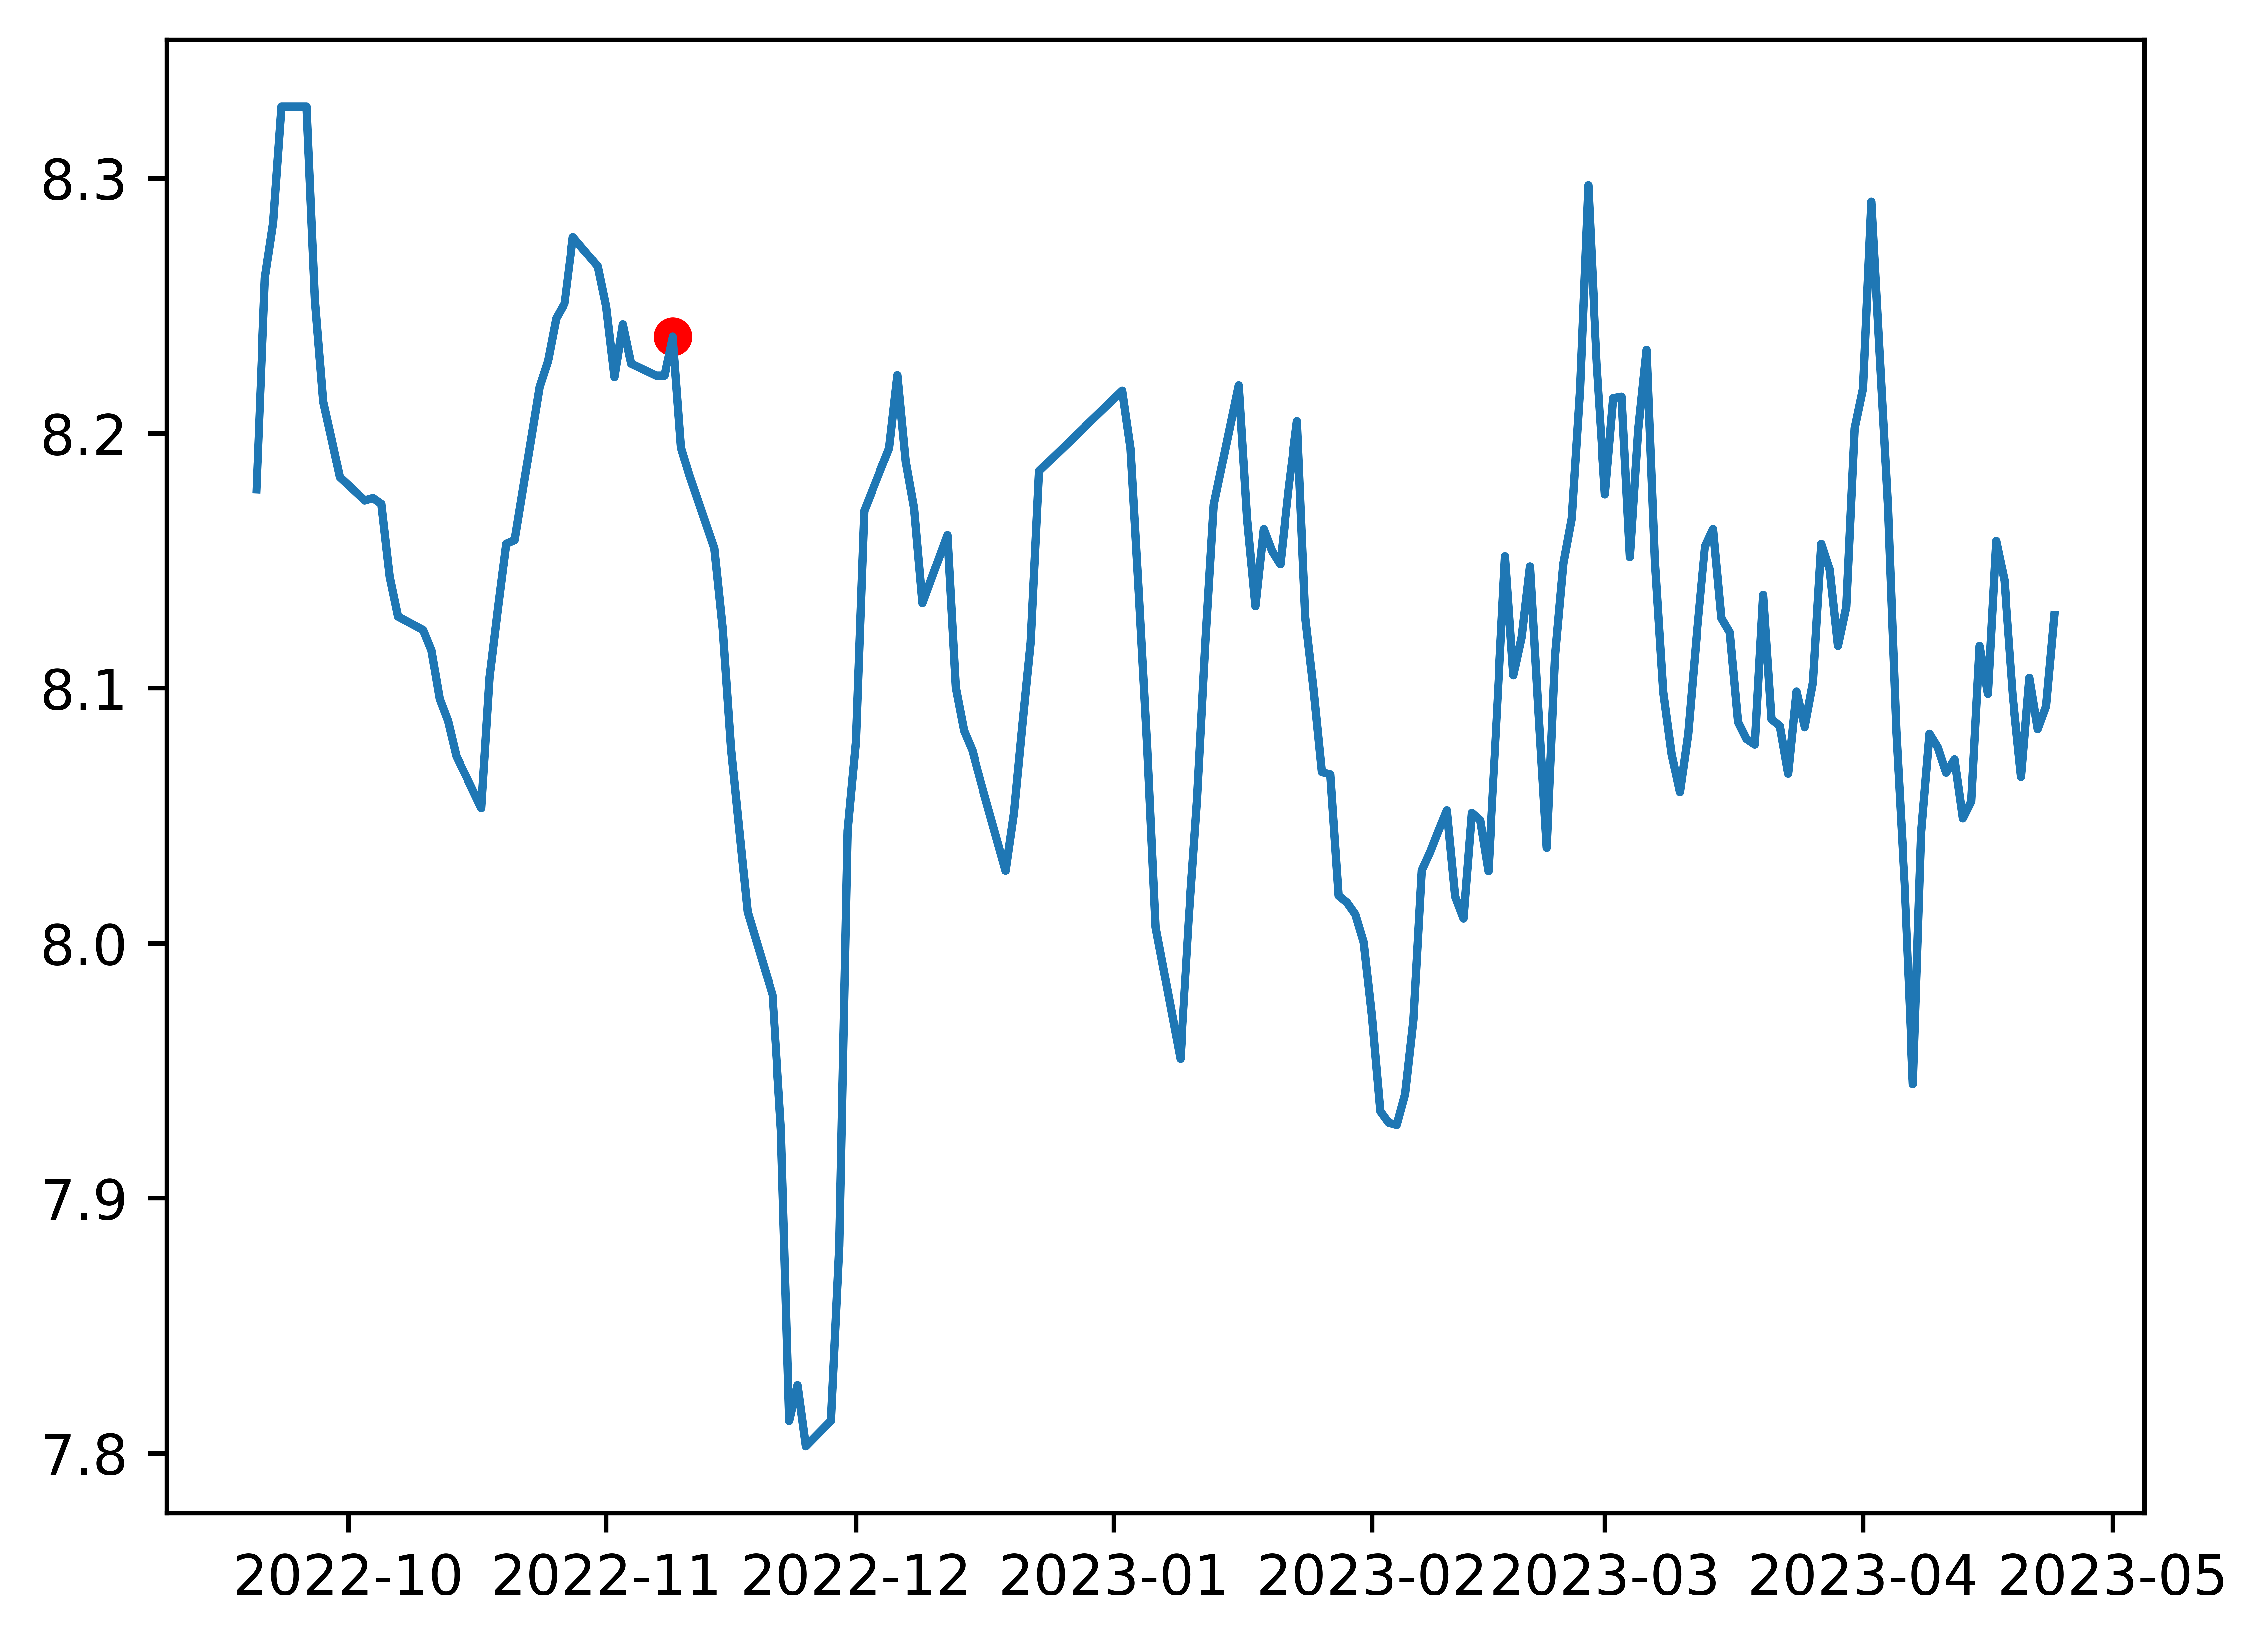

In [7]:
# évolution des prix étudiants moyens au cours du temps (rolling average 5)
plot_mean_student_price(
    mean_student_priced_menus_df,
    moving_average_window=5,
    student_price_col="STUDENT",
    date_col="date",
    display_RDR=True
)

<AxesSubplot: xlabel='date', ylabel='STUDENT'>

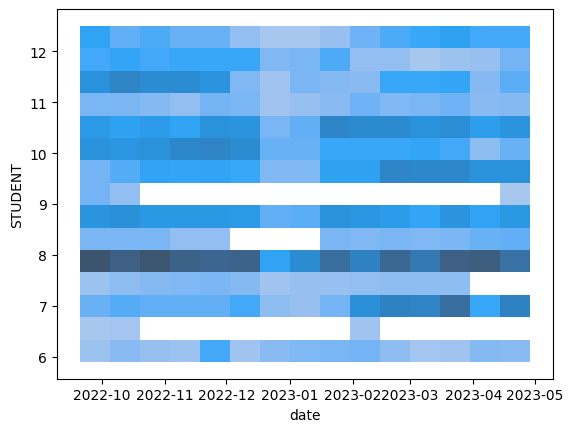

In [21]:
# évolution de l'histogramme des prix étudiants depuis septembre 2022
lower_bound = 5.80
upper_bound = 12.5

student_prices_df = flep_df[flep_df["STUDENT"] <= upper_bound].copy()
student_prices_df = student_prices_df[student_prices_df["STUDENT"] >= lower_bound]
student_prices_df.sort_values(by="date", inplace=True)
sns.histplot(student_prices_df, x="date", y="STUDENT", bins=15)

<AxesSubplot: xlabel='STUDENT', ylabel='Count'>

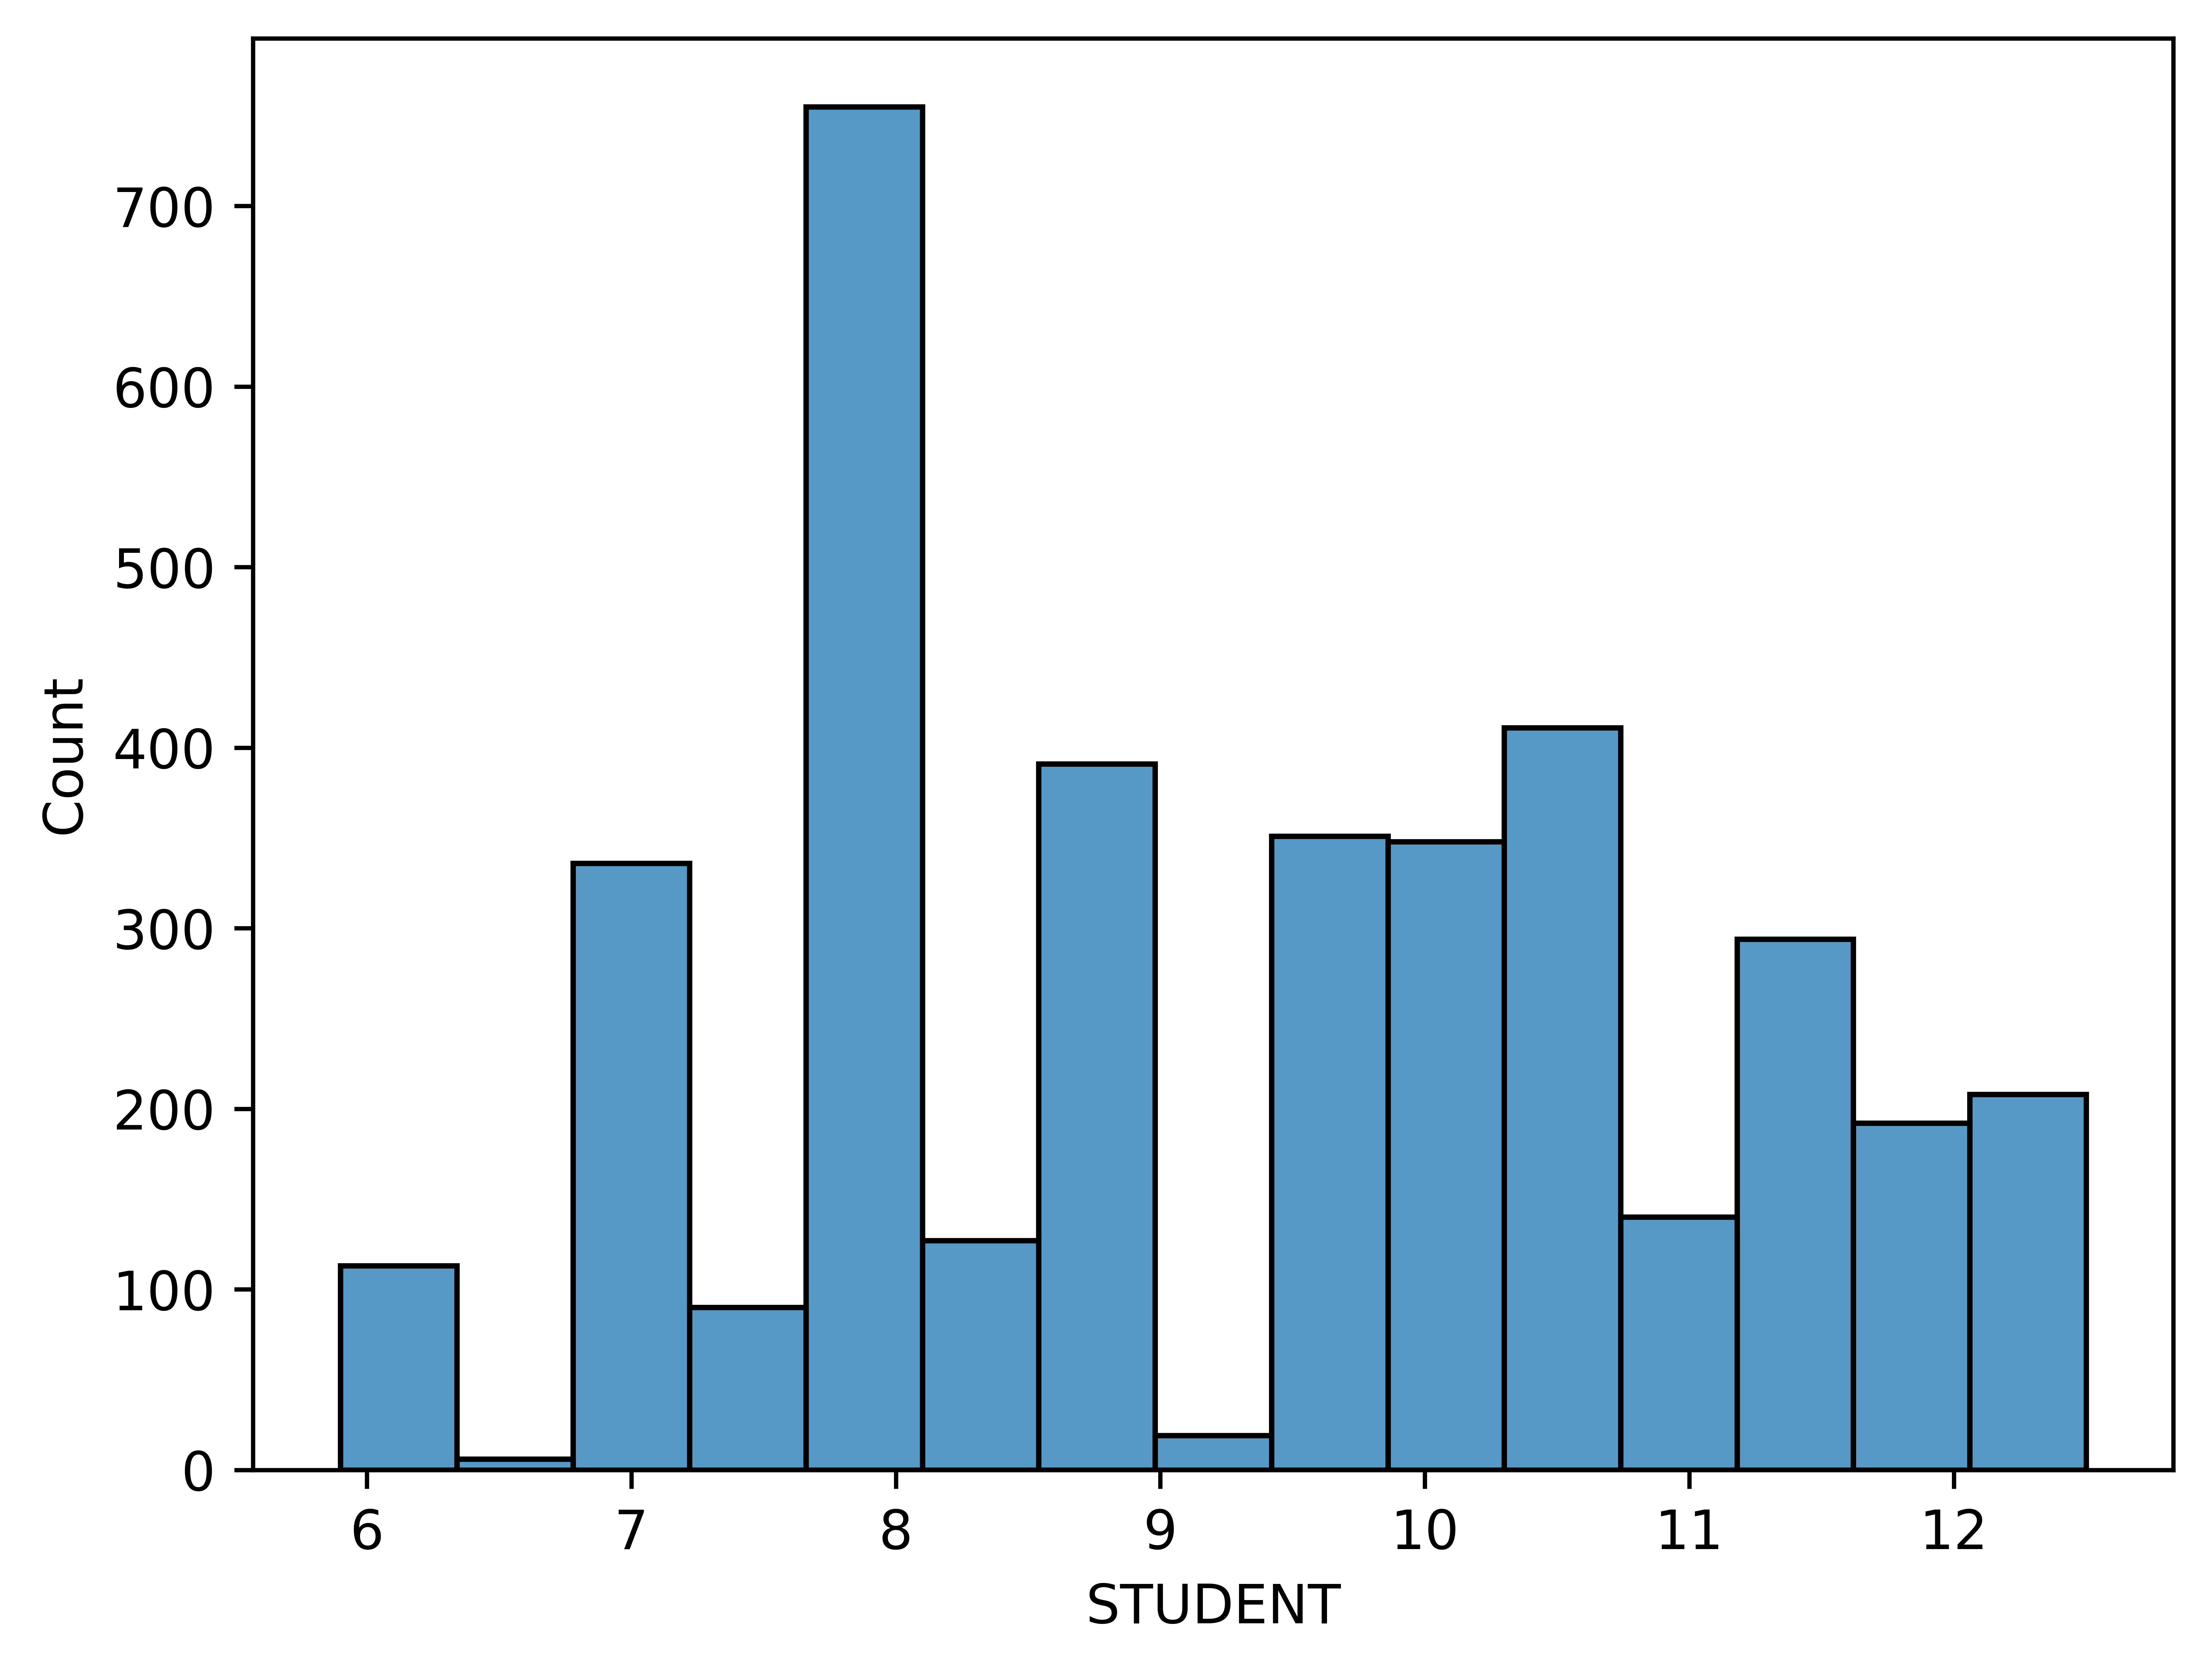

In [22]:
# histogramme des prix étudiants
plt.figure(dpi=1200)
sns.histplot(student_prices_df, x = "STUDENT", bins=15)

<AxesSubplot: xlabel='STUDENT', ylabel='Count'>

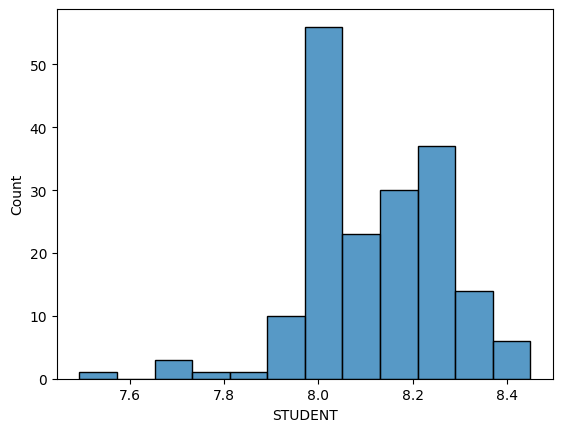

In [23]:
# histogramme des prix étudiants moyens par journée sur le semestre
sns.histplot(mean_student_priced_menus_df["STUDENT"])

In [20]:
#mediane des prix étudiants entre 5.9 et 8.1

lower_bound = 5.80
upper_bound = 12.5

student_prices_1_df = flep_df[flep_df["STUDENT"] <= upper_bound].copy()
student_prices_1_df = student_prices_1_df[student_prices_1_df["STUDENT"] >= lower_bound]

median_student_price = student_prices_1_df["STUDENT"].median()
print("median student price: ", median_student_price)

median student price:  9.5


In [ ]:
# Bag of words analysis of 5.9 names
lower_bound = 5.80
upper_bound = 8.15

stop_words = ['de', 'et', 'aux', 'au', 'la', ' ']

student_prices_2_df = flep_df[flep_df["STUDENT"] <= upper_bound].copy()
student_prices_2_df = student_prices_2_df[student_prices_2_df["STUDENT"] >= lower_bound]

student_prices_2_df["name"] = student_prices_2_df["name"].str.lower()
student_prices_2_df["name"] = student_prices_2_df["name"].str.replace(r"[^\w\s]", "")
student_prices_2_df["name"] = student_prices_2_df["name"].str.replace(r"\d+", "")
student_prices_2_df["name"] = student_prices_2_df["name"].str.replace(r"\s+", " ")

student_prices_2_df["name"] = student_prices_2_df["name"].str.split(" ")

student_prices_2_df["name"] = student_prices_2_df["name"].apply(lambda x: [item for item in x if item not in stop_words])

student_prices_2_df["name"].explode().value_counts().head(20)


name
               1893
sauce           236
salade          190
lgumes          190
gratin          161
cocotte         143
riz             135
penne           121
mozzarella      120
tomate          114
crme            114
pasta           114
champignons     112
grana           108
courge          100
padano           93
risotto          89
saison           75
basilic          72
pesto            66
Name: count, dtype: int64